# Seasonality Study

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
#
from Calculations_Functions import proportions_from_filename, metrics_table
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')

In [2]:
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_release_run_tau_0_01_ratio_0_2_sv_5_AD_0_052.zarr'
filename2 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_365_days_full_release_run_tau_0_01_ratio_0_2_sv_5_AD_0_052_restart_365_days_2nd_year_after_full_release.zarr'

In [3]:
vars_to_keep = ['trajectory', 'obs', 'lon', 'lat', 'z', 'time', 'status']
#
data = xr.open_dataset(filename, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename, engine = 'zarr').variables if v not in vars_to_keep])
data2 = xr.open_dataset(filename2, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename2, engine = 'zarr').variables if v not in vars_to_keep])

In [4]:
data_combined = xr.concat([data, data2], dim='obs' )

In [5]:
idx_JFM = int((90 * 86400) / 900)
idx_AMJ = int((181 * 86400) / 900)
idx_JAS = int((273 * 86400) / 900)
idx_OND = int((365 * 86400) / 900)
#
data_winter = data_combined.isel(trajectory=slice(0, idx_JFM), obs = slice(0, 365*4 + 90*4))
data_spring = data_combined.isel(trajectory=slice(idx_JFM, idx_AMJ), obs = slice(90*4, 365*4 + 181*4))
data_summer = data_combined.isel(trajectory=slice(idx_AMJ, idx_JAS), obs = slice(181*4, 365*4 + 273*4))
data_fall = data_combined.isel(trajectory=slice(idx_JAS, idx_OND), obs = slice(273*4, 365*4 + 365*4))

In [6]:
data_winter_last = data_combined.isel(trajectory=slice(0, idx_JFM), obs = slice(365*4, 365*4 + 4*90))
data_spring_last = data_combined.isel(trajectory=slice(idx_JFM, idx_AMJ), obs = slice(365*4 + 90*4, 365*4 + 4*181))
data_summer_last = data_combined.isel(trajectory=slice(idx_AMJ, idx_JAS), obs = slice(365*4 + 181*4, 365*4 + 4*273))
data_fall_last = data_combined.isel(trajectory=slice(idx_JAS, idx_OND), obs = slice(365*4 + 273*4, 365*4 + 365*4))

# Data by Season

Load functions for getting vertical profiles

In [7]:
from Regions_functions_V2 import polygon_definition_data, vertical_status_profiles_V2, interpolate_volume_profile, volume_by_depth_all_regions 

# Summer

In [8]:
polygon_dict_summer = polygon_definition_data(data_summer_last, time_step='day')

In [9]:
volumes_regions_depths = volume_by_depth_all_regions(polygon_dict_summer)
#
depth_bins_regions = 81
#####
volume_N1, depths_N1 = interpolate_volume_profile(volumes_regions_depths['N1'], depth_bins_regions)
#volume_N2, depths_N2 = interpolate_volume_profile(volumes_regions_depths['N2'], depth_bins_regions)
#volume_N3, depths_N3 = interpolate_volume_profile(volumes_regions_depths['N3'], depth_bins_regions)
#volume_C1, depths_C1 = interpolate_volume_profile(volumes_regions_depths['C1'], depth_bins_regions)
volume_S1, depths_S1 = interpolate_volume_profile(volumes_regions_depths['S1'], depth_bins_regions)
#volume_SP, depths_SP = interpolate_volume_profile(volumes_regions_depths['SP'], depth_bins_regions)
#volume_HW1, depths_HW1 = interpolate_volume_profile(volumes_regions_depths['HW1'], depth_bins_regions)
#volume_F1, depths_F1 = interpolate_volume_profile(volumes_regions_depths['F1'], depth_bins_regions)
#volume_S2, depths_S2 = interpolate_volume_profile(volumes_regions_depths['S2'], depth_bins_regions)
volume_H1, depths_H1 = interpolate_volume_profile(volumes_regions_depths['H1'], depth_bins_regions)
volume_J1, depths_J1 = interpolate_volume_profile(volumes_regions_depths['J1'], depth_bins_regions)
#
status_vertical_N1_summer = vertical_status_profiles_V2(polygon_dict_summer['N1'], depth_bin_edges=depths_N1)
#status_vertical_N2_summer = vertical_status_profiles_V2(polygon_dict_summer['N2'], depth_bin_edges=depths_N2)
#status_vertical_N3_summer = vertical_status_profiles_V2(polygon_dict_summer['N3'], depth_bin_edges=depths_N3)
#status_vertical_C1_summer = vertical_status_profiles_V2(polygon_dict_summer['C1'], depth_bin_edges=depths_C1)
status_vertical_S1_summer = vertical_status_profiles_V2(polygon_dict_summer['S1'], depth_bin_edges=depths_S1)
#status_vertical_SP_summer = vertical_status_profiles_V2(polygon_dict_summer['SP'], depth_bin_edges=depths_SP)
#status_vertical_HW1_summer = vertical_status_profiles_V2(polygon_dict_summer['HW1'], depth_bin_edges=depths_HW1)
#status_vertical_F1_summer = vertical_status_profiles_V2(polygon_dict_summer['F1'], depth_bin_edges=depths_F1)
#status_vertical_S2_summer = vertical_status_profiles_V2(polygon_dict_summer['S2'], depth_bin_edges=depths_S2)
status_vertical_H1_summer = vertical_status_profiles_V2(polygon_dict_summer['H1'], depth_bin_edges=depths_H1)
status_vertical_J1_summer = vertical_status_profiles_V2(polygon_dict_summer['J1'], depth_bin_edges=depths_J1)

# Winter

In [10]:
polygon_dict_winter = polygon_definition_data(data_winter_last, time_step='day')

In [11]:
status_vertical_N1_winter = vertical_status_profiles_V2(polygon_dict_winter['N1'], depth_bin_edges=depths_N1)
#status_vertical_N2_winter = vertical_status_profiles_V2(polygon_dict_winter['N2'], depth_bin_edges=depths_N2)
#status_vertical_N3_winter = vertical_status_profiles_V2(polygon_dict_winter['N3'], depth_bin_edges=depths_N3)
#status_vertical_C1_winter = vertical_status_profiles_V2(polygon_dict_winter['C1'], depth_bin_edges=depths_C1)
status_vertical_S1_winter = vertical_status_profiles_V2(polygon_dict_winter['S1'], depth_bin_edges=depths_S1)
#status_vertical_SP_winter = vertical_status_profiles_V2(polygon_dict_winter['SP'], depth_bin_edges=depths_SP)
#status_vertical_HW1_winter = vertical_status_profiles_V2(polygon_dict_winter['HW1'], depth_bin_edges=depths_HW1)
#status_vertical_F1_winter = vertical_status_profiles_V2(polygon_dict_winter['F1'], depth_bin_edges=depths_F1)
#status_vertical_S2_winter = vertical_status_profiles_V2(polygon_dict_winter['S2'], depth_bin_edges=depths_S2)
status_vertical_H1_winter = vertical_status_profiles_V2(polygon_dict_winter['H1'], depth_bin_edges=depths_H1)
status_vertical_J1_winter = vertical_status_profiles_V2(polygon_dict_winter['J1'], depth_bin_edges=depths_J1)

# Fall

In [12]:
polygon_dict_fall = polygon_definition_data(data_fall_last, time_step='day')

In [13]:
status_vertical_N1_fall = vertical_status_profiles_V2(polygon_dict_fall['N1'], depth_bin_edges=depths_N1)
#status_vertical_N2_fall = vertical_status_profiles_V2(polygon_dict_fall['N2'], depth_bin_edges=depths_N2)
#status_vertical_N3_fall = vertical_status_profiles_V2(polygon_dict_fall['N3'], depth_bin_edges=depths_N3)
#status_vertical_C1_fall = vertical_status_profiles_V2(polygon_dict_fall['C1'], depth_bin_edges=depths_C1)
status_vertical_S1_fall = vertical_status_profiles_V2(polygon_dict_fall['S1'], depth_bin_edges=depths_S1)
#status_vertical_SP_fall = vertical_status_profiles_V2(polygon_dict_fall['SP'], depth_bin_edges=depths_SP)
#status_vertical_HW1_fall = vertical_status_profiles_V2(polygon_dict_fall['HW1'], depth_bin_edges=depths_HW1)
#status_vertical_F1_fall = vertical_status_profiles_V2(polygon_dict_fall['F1'], depth_bin_edges=depths_F1)
#status_vertical_S2_fall = vertical_status_profiles_V2(polygon_dict_fall['S2'], depth_bin_edges=depths_S2)
status_vertical_H1_fall = vertical_status_profiles_V2(polygon_dict_fall['H1'], depth_bin_edges=depths_H1)
status_vertical_J1_fall = vertical_status_profiles_V2(polygon_dict_fall['J1'], depth_bin_edges=depths_J1)

# Spring

In [14]:
polygon_dict_spring = polygon_definition_data(data_spring_last, time_step='day')

In [15]:
status_vertical_N1_spring = vertical_status_profiles_V2(polygon_dict_spring['N1'], depth_bin_edges=depths_N1)
#status_vertical_N2_spring = vertical_status_profiles_V2(polygon_dict_spring['N2'], depth_bin_edges=depths_N2)
#status_vertical_N3_spring = vertical_status_profiles_V2(polygon_dict_spring['N3'], depth_bin_edges=depths_N3)
#status_vertical_C1_spring = vertical_status_profiles_V2(polygon_dict_spring['C1'], depth_bin_edges=depths_C1)
status_vertical_S1_spring = vertical_status_profiles_V2(polygon_dict_spring['S1'], depth_bin_edges=depths_S1)
#status_vertical_SP_spring = vertical_status_profiles_V2(polygon_dict_spring['SP'], depth_bin_edges=depths_SP)
#status_vertical_HW1_spring = vertical_status_profiles_V2(polygon_dict_spring['HW1'], depth_bin_edges=depths_HW1)
#status_vertical_F1_spring = vertical_status_profiles_V2(polygon_dict_spring['F1'], depth_bin_edges=depths_F1)
#status_vertical_S2_spring = vertical_status_profiles_V2(polygon_dict_spring['S2'], depth_bin_edges=depths_S2)
status_vertical_H1_spring = vertical_status_profiles_V2(polygon_dict_spring['H1'], depth_bin_edges=depths_H1)
status_vertical_J1_spring = vertical_status_profiles_V2(polygon_dict_spring['J1'], depth_bin_edges=depths_J1)

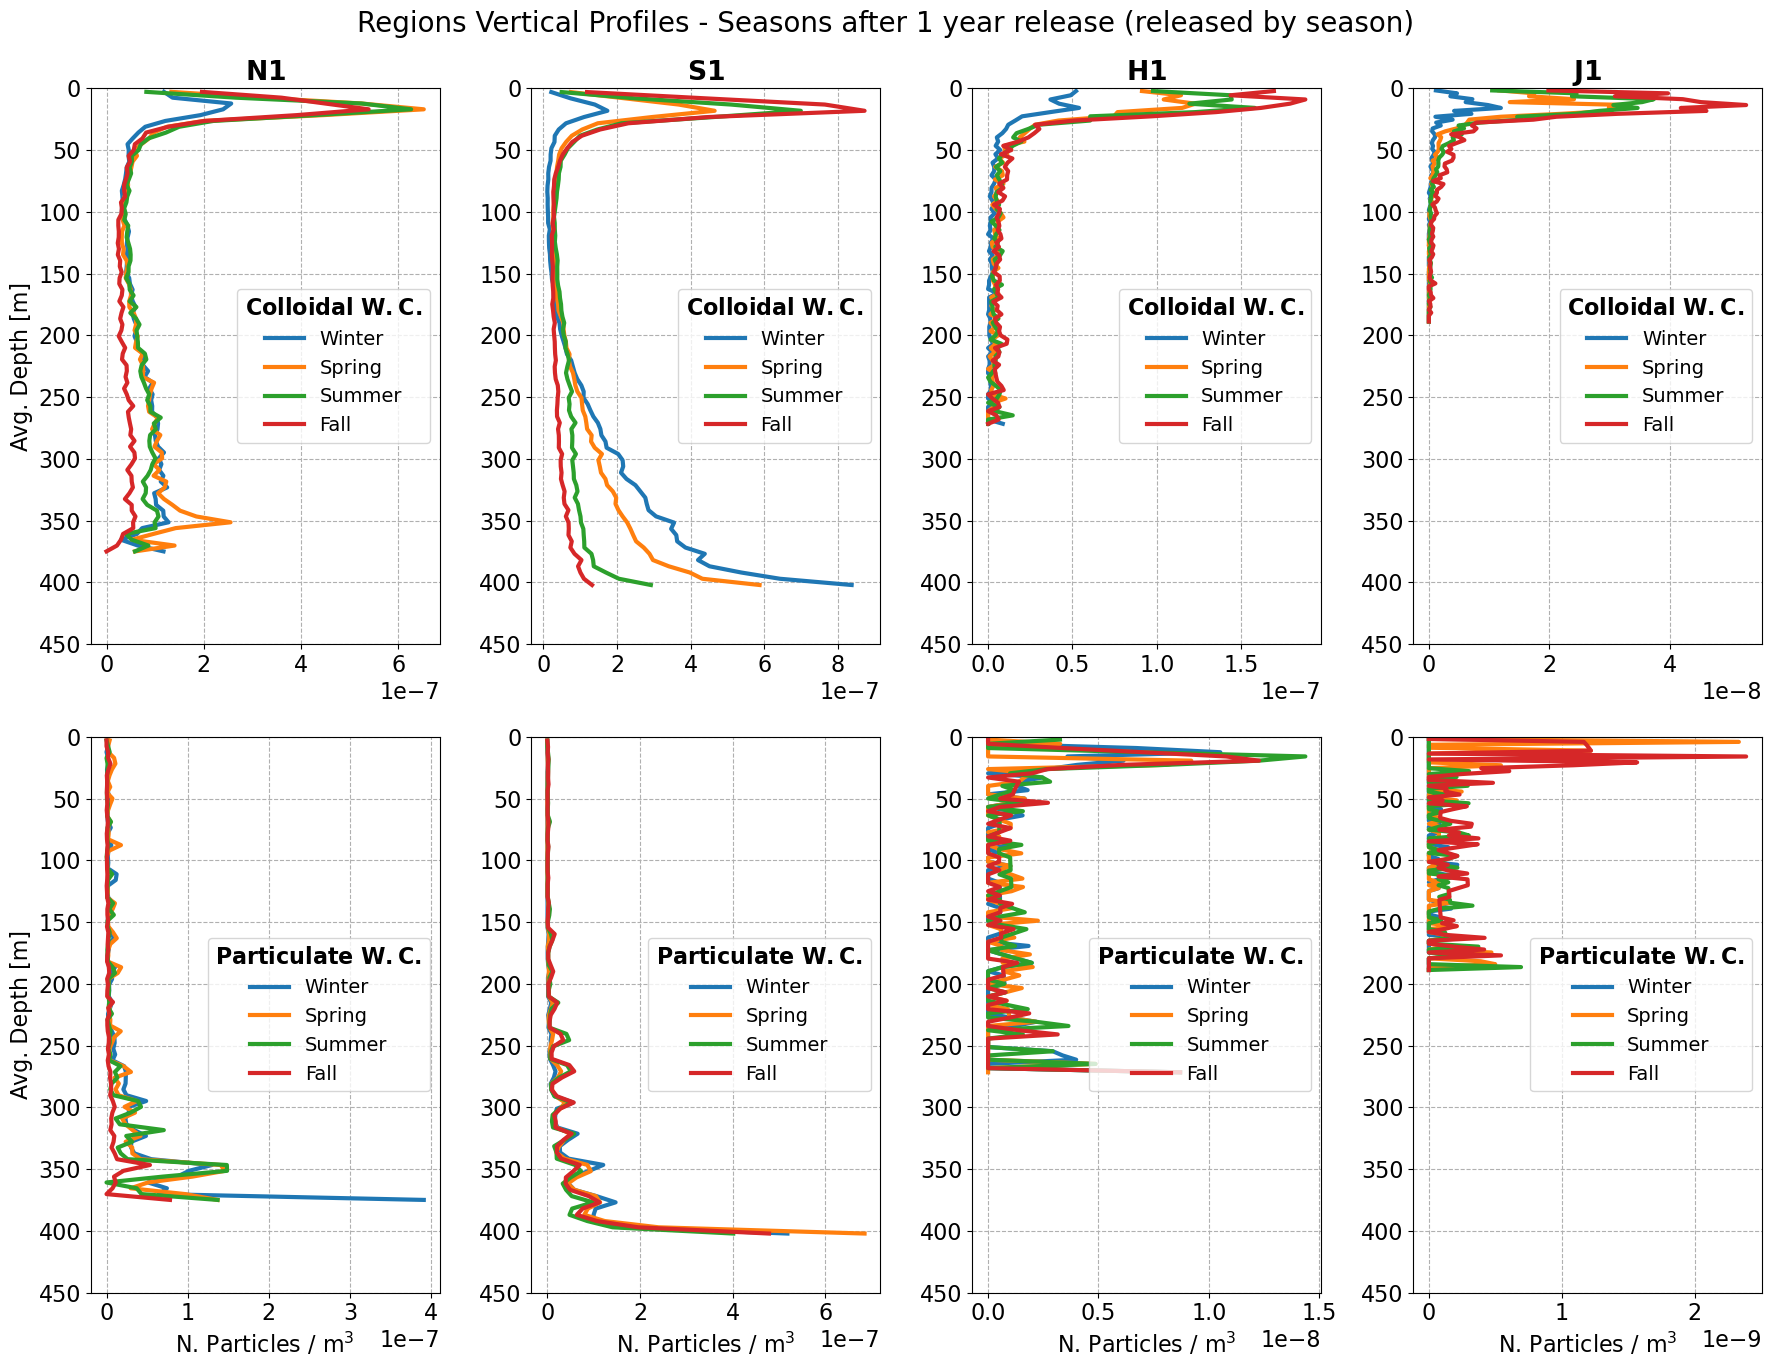

In [16]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2,4,figsize = (18,14))
ax[0,0].plot(status_vertical_N1_winter['Particles Status 2']  / volume_N1.values[:-1], status_vertical_N1_winter['Avg. Depth'], linewidth = 3, label = 'Winter')
ax[0,0].plot(status_vertical_N1_spring['Particles Status 2']  / volume_N1.values[:-1], status_vertical_N1_spring['Avg. Depth'], linewidth = 3,label = 'Spring')
ax[0,0].plot(status_vertical_N1_summer['Particles Status 2'] / volume_N1.values[:-1], status_vertical_N1_summer['Avg. Depth'], linewidth = 3,label = 'Summer')
ax[0,0].plot(status_vertical_N1_fall['Particles Status 2']  / volume_N1.values[:-1], status_vertical_N1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')

ax[0,0].invert_yaxis()
ax[0,0].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,0].set_ylim([450,0])
ax[0,0].set_title(r"$\bf{N1}$")
ax[0,0].grid(linestyle = '--')
ax[0,0].set_ylabel('Avg. Depth [m]')
#
ax[0,1].plot(status_vertical_S1_winter['Particles Status 2'] / volume_S1.values[:-1], status_vertical_S1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[0,1].plot(status_vertical_S1_spring['Particles Status 2'] / volume_S1.values[:-1], status_vertical_S1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[0,1].plot(status_vertical_S1_summer['Particles Status 2'] / volume_S1.values[:-1], status_vertical_S1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[0,1].plot(status_vertical_S1_fall['Particles Status 2'] / volume_S1.values[:-1], status_vertical_S1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')
ax[0,1].invert_yaxis()
ax[0,1].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,1].set_ylim([450,0])
ax[0,1].set_title(r"$\bf{S1}$")
ax[0,1].grid(linestyle = '--')

#
ax[0,2].plot(status_vertical_H1_winter['Particles Status 2'] / volume_H1.values[:-1], status_vertical_H1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[0,2].plot(status_vertical_H1_spring['Particles Status 2'] / volume_H1.values[:-1], status_vertical_H1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[0,2].plot(status_vertical_H1_summer['Particles Status 2'] / volume_H1.values[:-1], status_vertical_H1_summer['Avg. Depth'], linewidth = 3,label = 'Summer')
ax[0,2].plot(status_vertical_H1_fall['Particles Status 2'] / volume_H1.values[:-1], status_vertical_H1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')
ax[0,2].invert_yaxis()
ax[0,2].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,2].set_ylim([450,0])
ax[0,2].set_title(r"$\bf{H1}$")
ax[0,2].grid(linestyle = '--')

#
ax[0,3].plot(status_vertical_J1_winter['Particles Status 2'] / volume_J1.values[:-1], status_vertical_J1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[0,3].plot(status_vertical_J1_spring['Particles Status 2']  / volume_J1.values[:-1], status_vertical_J1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[0,3].plot(status_vertical_J1_summer['Particles Status 2']  / volume_J1.values[:-1], status_vertical_J1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[0,3].plot(status_vertical_J1_fall['Particles Status 2'] / volume_J1.values[:-1], status_vertical_J1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')
ax[0,3].invert_yaxis()
ax[0,3].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,3].set_ylim([450,0])
ax[0,3].set_title(r"$\bf{J1}$")
ax[0,3].grid(linestyle = '--')
################################
ax[1,0].plot(status_vertical_N1_winter['Particles Status 3'] / volume_N1.values[:-1], status_vertical_N1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,0].plot(status_vertical_N1_spring['Particles Status 3'] / volume_N1.values[:-1], status_vertical_N1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,0].plot(status_vertical_N1_summer['Particles Status 3'] / volume_N1.values[:-1], status_vertical_N1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,0].plot(status_vertical_N1_fall['Particles Status 3'] / volume_N1.values[:-1], status_vertical_N1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')

ax[1,0].invert_yaxis()
ax[1,0].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,0].set_ylim([450,0])
ax[1,0].grid(linestyle = '--')
ax[1,0].set_ylabel('Avg. Depth [m]')
ax[1,0].set_xlabel(r'N. Particles / m$^{3}$')
#
ax[1,1].plot(status_vertical_S1_winter['Particles Status 3'] / volume_S1.values[:-1], status_vertical_S1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,1].plot(status_vertical_S1_spring['Particles Status 3'] / volume_S1.values[:-1], status_vertical_S1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,1].plot(status_vertical_S1_summer['Particles Status 3'] / volume_S1.values[:-1], status_vertical_S1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,1].plot(status_vertical_S1_fall['Particles Status 3'] / volume_S1.values[:-1], status_vertical_S1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')
ax[1,1].invert_yaxis()
ax[1,1].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,1].set_ylim([450,0])
ax[1,1].grid(linestyle = '--')
ax[1,1].set_xlabel(r'N. Particles / m$^{3}$')

#
ax[1,2].plot(status_vertical_H1_winter['Particles Status 3'] / volume_H1.values[:-1], status_vertical_H1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,2].plot(status_vertical_H1_spring['Particles Status 3'] / volume_H1.values[:-1], status_vertical_H1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,2].plot(status_vertical_H1_summer['Particles Status 3'] / volume_H1.values[:-1], status_vertical_H1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,2].plot(status_vertical_H1_fall['Particles Status 3'] / volume_H1.values[:-1], status_vertical_H1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')
ax[1,2].invert_yaxis()
ax[1,2].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,2].set_ylim([450,0])
ax[1,2].grid(linestyle = '--')
ax[1,2].set_xlabel(r'N. Particles / m$^{3}$')

#
ax[1,3].plot(status_vertical_J1_winter['Particles Status 3'] / volume_J1.values[:-1], status_vertical_J1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,3].plot(status_vertical_J1_spring['Particles Status 3'] / volume_J1.values[:-1], status_vertical_J1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,3].plot(status_vertical_J1_summer['Particles Status 3'] / volume_J1.values[:-1], status_vertical_J1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,3].plot(status_vertical_J1_fall['Particles Status 3'] / volume_J1.values[:-1], status_vertical_J1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')
ax[1,3].invert_yaxis()
ax[1,3].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,3].set_ylim([450,0])
ax[1,3].grid(linestyle = '--')
ax[1,3].set_xlabel(r'N. Particles / m$^{3}$')

#
plt.suptitle('Regions Vertical Profiles - Seasons after 1 year release (released by season)', fontsize = 20)
plt.tight_layout()

- Better get final snapshots of each season after 1 year instead of plotting the full year, then we can get different and more significant patterns.
- Plot in depth from the bottom, because these patterns may be affected by the regions with deeper or shallower depths

So, make those changes!!


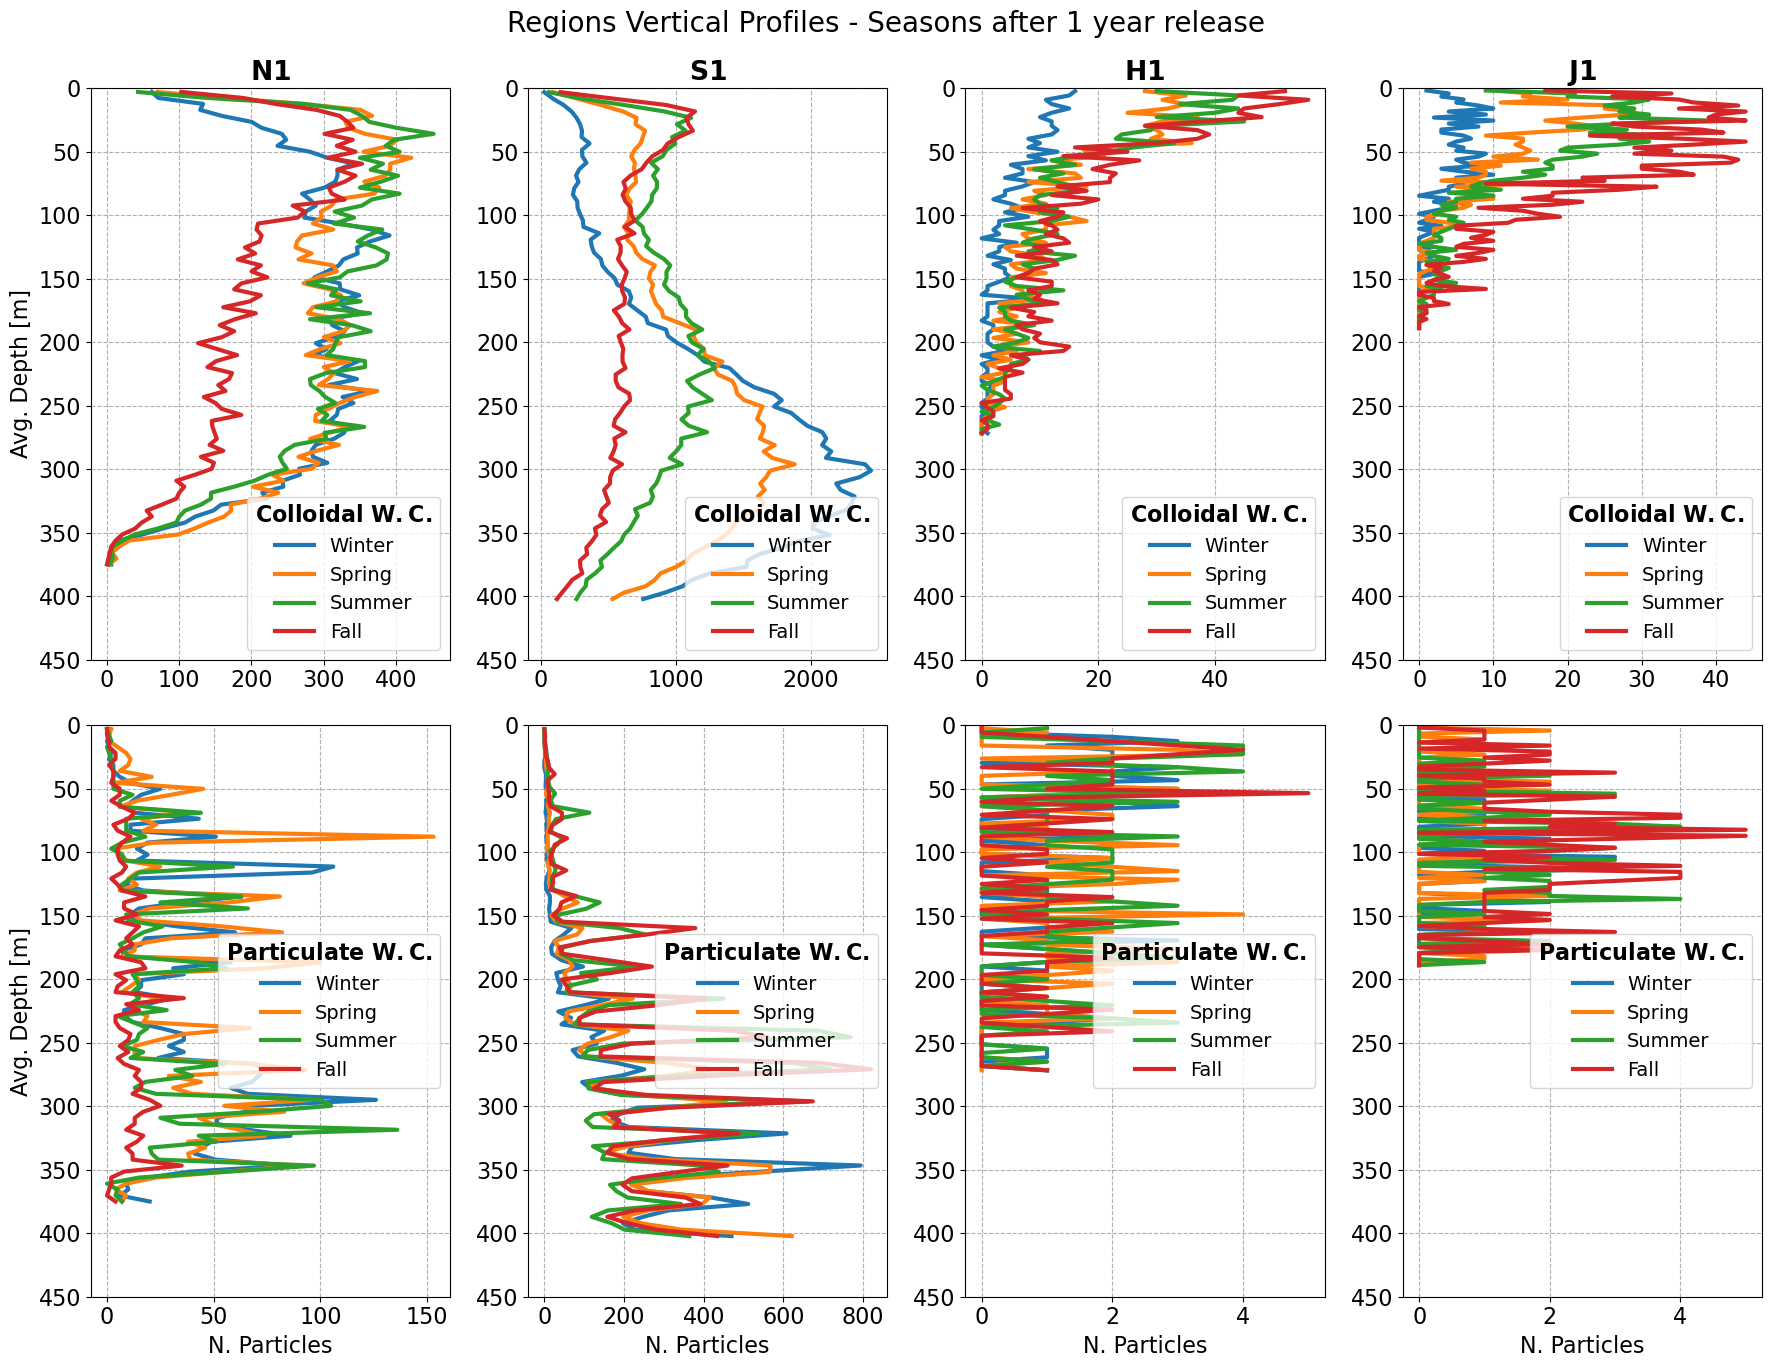

In [17]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2,4,figsize = (18,14))
ax[0,0].plot(status_vertical_N1_winter['Particles Status 2'], status_vertical_N1_winter['Avg. Depth'], linewidth = 3, label = 'Winter')
ax[0,0].plot(status_vertical_N1_spring['Particles Status 2'], status_vertical_N1_spring['Avg. Depth'], linewidth = 3,label = 'Spring')
ax[0,0].plot(status_vertical_N1_summer['Particles Status 2'], status_vertical_N1_summer['Avg. Depth'], linewidth = 3,label = 'Summer')
ax[0,0].plot(status_vertical_N1_fall['Particles Status 2'], status_vertical_N1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')

ax[0,0].invert_yaxis()
ax[0,0].legend(loc = 'lower right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,0].set_ylim([450,0])
ax[0,0].set_title(r"$\bf{N1}$")
ax[0,0].grid(linestyle = '--')
ax[0,0].set_ylabel('Avg. Depth [m]')
#
ax[0,1].plot(status_vertical_S1_winter['Particles Status 2'], status_vertical_S1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[0,1].plot(status_vertical_S1_spring['Particles Status 2'], status_vertical_S1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[0,1].plot(status_vertical_S1_summer['Particles Status 2'], status_vertical_S1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[0,1].plot(status_vertical_S1_fall['Particles Status 2'], status_vertical_S1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')
ax[0,1].invert_yaxis()
ax[0,1].legend(loc = 'lower right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,1].set_ylim([450,0])
ax[0,1].set_title(r"$\bf{S1}$")
ax[0,1].grid(linestyle = '--')

#
ax[0,2].plot(status_vertical_H1_winter['Particles Status 2'], status_vertical_H1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[0,2].plot(status_vertical_H1_spring['Particles Status 2'], status_vertical_H1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[0,2].plot(status_vertical_H1_summer['Particles Status 2'], status_vertical_H1_summer['Avg. Depth'], linewidth = 3,label = 'Summer')
ax[0,2].plot(status_vertical_H1_fall['Particles Status 2'], status_vertical_H1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')
ax[0,2].invert_yaxis()
ax[0,2].legend(loc = 'lower right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,2].set_ylim([450,0])
ax[0,2].set_title(r"$\bf{H1}$")
ax[0,2].grid(linestyle = '--')

#
ax[0,3].plot(status_vertical_J1_winter['Particles Status 2'], status_vertical_J1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[0,3].plot(status_vertical_J1_spring['Particles Status 2'], status_vertical_J1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[0,3].plot(status_vertical_J1_summer['Particles Status 2'], status_vertical_J1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[0,3].plot(status_vertical_J1_fall['Particles Status 2'], status_vertical_J1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')
ax[0,3].invert_yaxis()
ax[0,3].legend(loc = 'lower right', fontsize = 14, title = r"$\bf{Colloidal \ W.C.}$")
ax[0,3].set_ylim([450,0])
ax[0,3].set_title(r"$\bf{J1}$")
ax[0,3].grid(linestyle = '--')
################################
ax[1,0].plot(status_vertical_N1_winter['Particles Status 3'], status_vertical_N1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,0].plot(status_vertical_N1_spring['Particles Status 3'], status_vertical_N1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,0].plot(status_vertical_N1_summer['Particles Status 3'], status_vertical_N1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,0].plot(status_vertical_N1_fall['Particles Status 3'], status_vertical_N1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')

ax[1,0].invert_yaxis()
ax[1,0].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,0].set_ylim([450,0])
ax[1,0].grid(linestyle = '--')
ax[1,0].set_ylabel('Avg. Depth [m]')
ax[1,0].set_xlabel(r'N. Particles')
#
ax[1,1].plot(status_vertical_S1_winter['Particles Status 3'], status_vertical_S1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,1].plot(status_vertical_S1_spring['Particles Status 3'], status_vertical_S1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,1].plot(status_vertical_S1_summer['Particles Status 3'], status_vertical_S1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,1].plot(status_vertical_S1_fall['Particles Status 3'], status_vertical_S1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')
ax[1,1].invert_yaxis()
ax[1,1].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,1].set_ylim([450,0])
ax[1,1].grid(linestyle = '--')
ax[1,1].set_xlabel(r'N. Particles')

#
ax[1,2].plot(status_vertical_H1_winter['Particles Status 3'], status_vertical_H1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,2].plot(status_vertical_H1_spring['Particles Status 3'], status_vertical_H1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,2].plot(status_vertical_H1_summer['Particles Status 3'], status_vertical_H1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,2].plot(status_vertical_H1_fall['Particles Status 3'], status_vertical_H1_fall['Avg. Depth'],linewidth = 3, label = 'Fall')
ax[1,2].invert_yaxis()
ax[1,2].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,2].set_ylim([450,0])
ax[1,2].grid(linestyle = '--')
ax[1,2].set_xlabel(r'N. Particles')

#
ax[1,3].plot(status_vertical_J1_winter['Particles Status 3'], status_vertical_J1_winter['Avg. Depth'],linewidth = 3, label = 'Winter')
ax[1,3].plot(status_vertical_J1_spring['Particles Status 3'], status_vertical_J1_spring['Avg. Depth'],linewidth = 3, label = 'Spring')
ax[1,3].plot(status_vertical_J1_summer['Particles Status 3'], status_vertical_J1_summer['Avg. Depth'],linewidth = 3, label = 'Summer')
ax[1,3].plot(status_vertical_J1_fall['Particles Status 3'], status_vertical_J1_fall['Avg. Depth'], linewidth = 3,label = 'Fall')
ax[1,3].invert_yaxis()
ax[1,3].legend(loc = 'center right', fontsize = 14, title = r"$\bf{Particulate \ W.C.}$")
ax[1,3].set_ylim([450,0])
ax[1,3].grid(linestyle = '--')
ax[1,3].set_xlabel(r'N. Particles')

#
plt.suptitle('Regions Vertical Profiles - Seasons after 1 year release', fontsize = 20)
plt.tight_layout()

# Seasonal Concentration Maps

Options:
- Map the final snapshot of the last day of each season while releasing to see where these are going within the same season,
- Map the whole second year seasons with no release but full particle count.
- Map a yearly snapchot of what happens when release in winter to winter, spring to spring, summer to summer and fall to fall.


Some other ideas:
- IF timeseries and maps, we can separate the simulations with seasonal decomposition and do an EOF analysis to get potentially a relation between spatial and temopral patterns :D

In [18]:
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
volume = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')['volume']

In [19]:
def particles_amount_map(lons, lats, mask=mask, num_lon=60, num_lat=70):
    # Define lon and lat lenght 
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)
    #
    # Particle positions into bins
    lon_indices = np.digitize(lons, longitudes) - 1 
    lat_indices = np.digitize(lats, latitudes) - 1
    #
    amount = np.zeros((num_lon, num_lat))
    #
    valid_mask = (lon_indices >= 0) & (lon_indices < num_lon) & (lat_indices >= 0) & (lat_indices < num_lat)
    lon_indices, lat_indices = lon_indices[valid_mask], lat_indices[valid_mask]
    # Count particles 
    indices = np.ravel_multi_index((lon_indices, lat_indices), dims=(num_lon, num_lat))
    counts = np.bincount(indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
    #
    amount[:counts.shape[0], :counts.shape[1]] = counts
    #
    return pd.DataFrame(amount)

In [20]:
def particles_amount_map_by_depth(lons, lats, depths, depth_bins, mask=mask, num_lon=80, num_lat=80):
    # Create lon-lat bins
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # Assign lon/lat indices to bins
    lon_indices = np.digitize(lons, longitudes) - 1
    lat_indices = np.digitize(lats, latitudes) - 1

    # Mask valid bin positions
    valid_mask = (
        (lon_indices >= 0) & (lon_indices < num_lon) &
        (lat_indices >= 0) & (lat_indices < num_lat)
    )
    lon_indices = lon_indices[valid_mask]
    lat_indices = lat_indices[valid_mask]
    depths = depths[valid_mask]  # Filter depths accordingly

    # Dictionary to store results
    results = {}

    for depth_min, depth_max in depth_bins:
        # Mask for particles in current depth range
        depth_mask = (depths >= depth_min) & (depths <= depth_max)
        lon_i = lon_indices[depth_mask]
        lat_i = lat_indices[depth_mask]

        # Count particles in 2D bins
        if len(lon_i) > 0:
            flat_indices = np.ravel_multi_index((lon_i, lat_i), dims=(num_lon, num_lat))
            counts = np.bincount(flat_indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
        else:
            counts = np.zeros((num_lon, num_lat))

        # Store as DataFrame
        label = f"{depth_min}-{depth_max} m"
        results[label] = pd.DataFrame(counts)

    return results

In [21]:
def particles_concentration_map(lons, lats, mask=mask, volume=volume, num_lon=80, num_lat=80):
    # Define bin edges
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # Bin particle positions
    lon_indices = np.digitize(lons, longitudes) - 1 
    lat_indices = np.digitize(lats, latitudes) - 1
    valid_mask = (lon_indices >= 0) & (lon_indices < num_lon) & (lat_indices >= 0) & (lat_indices < num_lat)
    lon_indices, lat_indices = lon_indices[valid_mask], lat_indices[valid_mask]

    # Count particles
    indices = np.ravel_multi_index((lon_indices, lat_indices), dims=(num_lon, num_lat))
    amount = np.bincount(indices, minlength=num_lon * num_lat).reshape((num_lon, num_lat))

    # Sum volume vertically
    volume_2d = volume.sum(dim='z')  # adjust if depth dim is named differently
    mask_lon = mask['nav_lon'].values
    mask_lat = mask['nav_lat'].values
    volume_vals = volume_2d.values

    # Flatten and bin volume grid cells
    flat_vol = volume_vals.ravel()
    flat_lon = mask_lon.ravel()
    flat_lat = mask_lat.ravel()

    lon_bins = np.digitize(flat_lon, longitudes) - 1
    lat_bins = np.digitize(flat_lat, latitudes) - 1
    valid = (lon_bins >= 0) & (lon_bins < num_lon) & (lat_bins >= 0) & (lat_bins < num_lat)
    lon_bins, lat_bins, flat_vol = lon_bins[valid], lat_bins[valid], flat_vol[valid]

    vol_indices = np.ravel_multi_index((lon_bins, lat_bins), dims=(num_lon, num_lat))
    volume_per_bin = np.bincount(vol_indices, weights=flat_vol, minlength=num_lon * num_lat).reshape((num_lon, num_lat))

    # Compute concentration
    with np.errstate(divide='ignore', invalid='ignore'):
        concentration = np.where(volume_per_bin > 0, amount / volume_per_bin, np.nan)

    return pd.DataFrame(concentration)

In [22]:
def particles_concentration_map_by_depth(lons, lats, depths, depth_bins, mask=mask, volume=volume, num_lon=80, num_lat=80):
    """
    Compute particle concentration (particles/m³) in lon-lat bins by depth range.

    Parameters:
    - lons, lats, depths: arrays of particle positions
    - depth_bins: list of (min_depth, max_depth) tuples
    - mask: xarray.Dataset with 'nav_lon', 'nav_lat' [y, x]
    - volume: xarray.DataArray of shape [z, y, x], model volume per grid cell
    - num_lon, num_lat: number of bins along lon and lat

    Returns:
    - dict of DataFrames: {depth_range_str: DataFrame of concentrations}
    """

    # 1. Define lon/lat bin edges
    longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon + 1)
    latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat + 1)

    # 2. Digitize particle positions into lon-lat bins
    lon_idx = np.digitize(lons, longitudes) - 1
    lat_idx = np.digitize(lats, latitudes) - 1

    valid = (lon_idx >= 0) & (lon_idx < num_lon) & (lat_idx >= 0) & (lat_idx < num_lat)
    lon_idx = lon_idx[valid]
    lat_idx = lat_idx[valid]
    depths = depths[valid]

    # 3. Flatten model grid to bin volume
    nav_lon = mask['nav_lon'].values.ravel()
    nav_lat = mask['nav_lat'].values.ravel()
    ny, nx = mask['nav_lon'].shape

    grid_lon_idx = np.digitize(nav_lon, longitudes) - 1
    grid_lat_idx = np.digitize(nav_lat, latitudes) - 1

    grid_valid = (
        (grid_lon_idx >= 0) & (grid_lon_idx < num_lon) &
        (grid_lat_idx >= 0) & (grid_lat_idx < num_lat)
    )
    grid_lon_idx = grid_lon_idx[grid_valid]
    grid_lat_idx = grid_lat_idx[grid_valid]

    flat_index_map = np.full(nav_lon.shape, -1, dtype=int)
    flat_index_map[grid_valid] = np.ravel_multi_index(
        (grid_lon_idx, grid_lat_idx), dims=(num_lon, num_lat)
    )

    # 4. Loop over depth ranges
    results = {}

    for depth_min, depth_max in depth_bins:
        label = f"{depth_min}-{depth_max} m"

        # (a) Count particles in this depth range
        depth_mask = (depths >= depth_min) & (depths <= depth_max)
        lon_i = lon_idx[depth_mask]
        lat_i = lat_idx[depth_mask]

        if len(lon_i) > 0:
            part_flat = np.ravel_multi_index((lon_i, lat_i), dims=(num_lon, num_lat))
            counts = np.bincount(part_flat, minlength=num_lon * num_lat).reshape((num_lon, num_lat))
        else:
            counts = np.zeros((num_lon, num_lat))

        # (b) Get volume from model grid for this depth range
        # Assuming model z levels are from shallow (0) to deep
        z = volume['z'].values
        if z[0] > z[-1]:
            z = z[::-1]
            volume = volume.sel(z=z)

        # Identify which z-levels fall into the depth bin
        z_mask = (z >= depth_min) & (z <= depth_max)
        z_indices = np.where(z_mask)[0]

        if len(z_indices) > 0:
            # Extract and sum volume for those z levels
            vol_slice = volume.isel(z=z_indices).sum(dim='z').values  # shape: [y, x]
        else:
            # Create dummy zero array to avoid empty index crash
            vol_slice = np.zeros((volume.shape[1], volume.shape[2]))  # shape: [y, x]

        vol_flat = vol_slice.ravel()

        # (c) Bin volume using the same lon-lat binning
        valid_vol = flat_index_map >= 0
        flat_indices = flat_index_map[valid_vol]
        vol_vals = vol_flat[valid_vol]

        volume_per_bin = np.bincount(flat_indices, weights=vol_vals, minlength=num_lon * num_lat).reshape((num_lon, num_lat))

        # (d) Compute concentration
        with np.errstate(divide='ignore', invalid='ignore'):
            concentration = np.where(volume_per_bin > 0, counts / volume_per_bin, np.nan)

        results[label] = pd.DataFrame(concentration)

    return results

In [23]:
lon_sed = data_combined.where(data_combined['status'] > 10)['lon'].values.flatten()        
lat_sed = data_combined.where(data_combined['status'] > 10)['lat'].values.flatten()
depth_sed = data_combined.where(data_combined['status'] > 10)['z'].values.flatten()
#########
lon_wat = data_combined.where((data_combined['status'] > 0) & (data_combined['status'] < 4))['lon'].values.flatten()
lat_wat = data_combined.where((data_combined['status'] > 0) & (data_combined['status'] < 4))['lat'].values.flatten()
depth_wat = data_combined.where((data_combined['status'] > 0) & (data_combined['status'] < 4))['z'].values.flatten()

Depth ranges

In [24]:
depths_bins = [(0,50), (50,200), (200,400)]

In [25]:
labels = ['0-50 m', '50-200 m', '200-400 m']

In [26]:
amount_sediment = particles_amount_map_by_depth(lons=lon_sed, lats=lat_sed, depths = depth_sed, depth_bins = depths_bins)
amount_water = particles_amount_map_by_depth(lons=lon_wat, lats=lat_wat, depths = depth_wat, depth_bins = depths_bins)
total_amount = particles_amount_map_by_depth(lons=data_combined['lon'].values.flatten(), lats=data_combined['lat'].values.flatten(), depths = data_combined['z'].values.flatten(), depth_bins = depths_bins)
#
total_amount_sediment = particles_amount_map(lons=lon_sed, lats=lat_sed)
total_amount_water = particles_amount_map(lons=lon_wat, lats=lat_wat)
total_amount_depth = particles_amount_map(lons=data_combined['lon'], lats=data_combined['lat'])

In [27]:
concentration_sediment = particles_concentration_map_by_depth(lons=lon_sed, lats=lat_sed, depths = depth_sed, depth_bins = depths_bins)
concentration_water = particles_concentration_map_by_depth(lons=lon_wat, lats=lat_wat, depths = depth_wat, depth_bins = depths_bins)
total_concentration = particles_concentration_map_by_depth(lons=data_combined['lon'].values.flatten(), lats=data_combined['lat'].values.flatten(), depths = data_combined['z'].values.flatten(), depth_bins = depths_bins)
#
total_concentration_sediment = particles_concentration_map(lons=lon_sed, lats=lat_sed)
total_concentration_water = particles_concentration_map(lons=lon_wat, lats=lat_wat)
total_concentration_depth = particles_concentration_map(lons=data_combined['lon'], lats=data_combined['lat'])

In [28]:
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

In [29]:
#TT = 1e-6
#norm_concentration = LogNorm(vmin=total_amount_depth.min().min() + 1e-8, vmax=total_amount_depth.max().max())

In [30]:
clat = [49.195045]
clon = [-123.301956]
num_lon = 80
num_lat = 80
longitudes = np.linspace(mask['nav_lon'].min(), mask['nav_lon'].max(), num_lon)
latitudes = np.linspace(mask['nav_lat'].min(), mask['nav_lat'].max(), num_lat)

Seasons contours

Winter

In [32]:
lon_sed_winter = data_winter_last.where(data_winter_last['status'] > 10)['lon'].values.flatten()        
lat_sed_winter = data_winter_last.where(data_winter_last['status'] > 10)['lat'].values.flatten()
depth_sed_winter = data_winter_last.where(data_winter_last['status'] > 10)['z'].values.flatten()
#
lon_wat_winter = data_winter_last.where((data_winter_last['status'] > 0) & (data_winter_last['status'] < 4))['lon'].values.flatten()
lat_wat_winter = data_winter_last.where((data_winter_last['status'] > 0) & (data_winter_last['status'] < 4))['lat'].values.flatten()
depth_wat_winter = data_winter_last.where((data_winter_last['status'] > 0) & (data_winter_last['status'] < 4))['z'].values.flatten()
#
water_amount_winter = particles_amount_map_by_depth(lons=lon_wat_winter, lats=lat_wat_winter, depths = depth_wat_winter, depth_bins = depths_bins)
sediment_amount_winter = particles_amount_map_by_depth(lons=lon_sed_winter, lats=lat_sed_winter, depths = depth_sed_winter, depth_bins = depths_bins)

Spring

In [33]:
lon_sed_spring = data_spring_last.where(data_spring_last['status'] > 10)['lon'].values.flatten()        
lat_sed_spring = data_spring_last.where(data_spring_last['status'] > 10)['lat'].values.flatten()
depth_sed_spring = data_spring_last.where(data_spring_last['status'] > 10)['z'].values.flatten()
#
lon_wat_spring = data_spring_last.where((data_spring_last['status'] > 0) & (data_spring_last['status'] < 4))['lon'].values.flatten()
lat_wat_spring = data_spring_last.where((data_spring_last['status'] > 0) & (data_spring_last['status'] < 4))['lat'].values.flatten()
depth_wat_spring = data_spring_last.where((data_spring_last['status'] > 0) & (data_spring_last['status'] < 4))['z'].values.flatten()
#
water_amount_spring = particles_amount_map_by_depth(lons=lon_wat_spring, lats=lat_wat_spring, depths = depth_wat_spring, depth_bins = depths_bins)
sediment_amount_spring = particles_amount_map_by_depth(lons=lon_sed_spring, lats=lat_sed_spring, depths = depth_sed_spring, depth_bins = depths_bins)

Summer

In [34]:
lon_sed_summer = data_summer_last.where(data_summer_last['status'] > 10)['lon'].values.flatten()        
lat_sed_summer = data_summer_last.where(data_summer_last['status'] > 10)['lat'].values.flatten()
depth_sed_summer = data_summer_last.where(data_summer_last['status'] > 10)['z'].values.flatten()
#
lon_wat_summer = data_summer_last.where((data_summer_last['status'] > 0) & (data_summer_last['status'] < 4))['lon'].values.flatten()
lat_wat_summer = data_summer_last.where((data_summer_last['status'] > 0) & (data_summer_last['status'] < 4))['lat'].values.flatten()
depth_wat_summer = data_summer_last.where((data_summer_last['status'] > 0) & (data_summer_last['status'] < 4))['z'].values.flatten()
#
water_amount_summer = particles_amount_map_by_depth(lons=lon_wat_summer, lats=lat_wat_summer, depths = depth_wat_summer, depth_bins = depths_bins)
sediment_amount_summer = particles_amount_map_by_depth(lons=lon_sed_summer, lats=lat_sed_summer, depths = depth_sed_summer, depth_bins = depths_bins)

Fall

In [35]:
lon_sed_fall = data_fall_last.where(data_fall_last['status'] > 10)['lon'].values.flatten()        
lat_sed_fall = data_fall_last.where(data_fall_last['status'] > 10)['lat'].values.flatten()
depth_sed_fall = data_fall_last.where(data_fall_last['status'] > 10)['z'].values.flatten()
#
lon_wat_fall = data_fall_last.where((data_fall_last['status'] > 0) & (data_fall_last['status'] < 4))['lon'].values.flatten()
lat_wat_fall = data_fall_last.where((data_fall_last['status'] > 0) & (data_fall_last['status'] < 4))['lat'].values.flatten()
depth_wat_fall = data_fall_last.where((data_fall_last['status'] > 0) & (data_fall_last['status'] < 4))['z'].values.flatten()
#
water_amount_fall = particles_amount_map_by_depth(lons=lon_wat_fall, lats=lat_wat_fall, depths = depth_wat_fall, depth_bins = depths_bins)
sediment_amount_fall = particles_amount_map_by_depth(lons=lon_sed_fall, lats=lat_sed_fall, depths = depth_sed_fall, depth_bins = depths_bins)

In [ ]:
Q1 = 10
Q2 = 25
Q3 = 50
#
d_water_surface1 = amount_water['0-50 m'].replace(0.0, np.nan).values.ravel()
TT_water_surface1 = np.nanpercentile(d_water_surface1, q = Q1)
#
d_sediment_surface1 = amount_sediment['0-50 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_surface1 = np.nanpercentile(d_sediment_surface1, q = Q1)
#
d_water_surface2 = amount_water['0-50 m'].replace(0.0, np.nan).values.ravel()
TT_water_surface2 = np.nanpercentile(d_water_surface2, q = Q2)
#
d_sediment_surface2 = amount_sediment['0-50 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_surface2 = np.nanpercentile(d_sediment_surface2, q = Q2)
#
d_water_surface3 = amount_water['0-50 m'].replace(0.0, np.nan).values.ravel()
TT_water_surface3 = np.nanpercentile(d_water_surface3, q = Q3)
#
d_sediment_surface3 = amount_sediment['0-50 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_surface3 = np.nanpercentile(d_sediment_surface3, q = Q3)
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  
d_water_intermediate1 = amount_water['50-200 m'].replace(0.0, np.nan).values.ravel()
TT_water_intermediate1 = np.nanpercentile(d_water_intermediate1, q = Q1)
#
d_sediment_intermediate1 = amount_sediment['50-200 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_intermediate1 = np.nanpercentile(d_sediment_intermediate1, q = Q1)
#
d_water_intermediate2 = amount_water['50-200 m'].replace(0.0, np.nan).values.ravel()
TT_water_intermediate2 = np.nanpercentile(d_water_intermediate2, q = Q2)
#
d_sediment_intermediate2 = amount_sediment['50-200 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_intermediate2 = np.nanpercentile(d_sediment_intermediate2, q = Q2)
#
d_water_intermediate3 = amount_water['50-200 m'].replace(0.0, np.nan).values.ravel()
TT_water_intermediate3 = np.nanpercentile(d_water_intermediate3, q = Q3)
#
d_sediment_intermediate3 = amount_sediment['50-200 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_intermediate3 = np.nanpercentile(d_sediment_intermediate3, q = Q3)
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  
d_water_bottom1 = amount_water['200-400 m'].replace(0.0, np.nan).values.ravel()
TT_water_bottom1 = np.nanpercentile(d_water_bottom1, q = Q1)
#
d_sediment_bottom1 = amount_sediment['200-400 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_bottom1 = np.nanpercentile(d_sediment_bottom1, q = Q1)
#
d_water_bottom2 = amount_water['200-400 m'].replace(0.0, np.nan).values.ravel()
TT_water_bottom2 = np.nanpercentile(d_water_bottom2, q = Q2)
#
d_sediment_bottom2 = amount_sediment['200-400 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_bottom2 = np.nanpercentile(d_sediment_bottom2, q = Q2)
#
d_water_bottom3 = amount_water['200-400 m'].replace(0.0, np.nan).values.ravel()
TT_water_bottom3 = np.nanpercentile(d_water_bottom3, q = Q3)
#
d_sediment_bottom3 = amount_sediment['200-400 m'].replace(0.0, np.nan).values.ravel()
TT_sediment_bottom3 = np.nanpercentile(d_sediment_bottom3, q = Q3)

In [213]:
total_amount_depth.max().max() / 1000

26890.377

In [214]:
norm = LogNorm(vmin=total_amount_depth.min().min() + 1e-1, vmax=total_amount_depth.max().max())

/tmp/ipykernel_2900924/503163366.py:46: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[row, col_idx].pcolormesh(mask['nav_lon'], mask['nav_lat'],
/tmp/ipykernel_2900924/503163366.py:46: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[row, col_idx].pcolormesh(mask['nav_lon'], mask['nav_lat'],
/tmp/ipykernel_2900924/503163366.py:46: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  

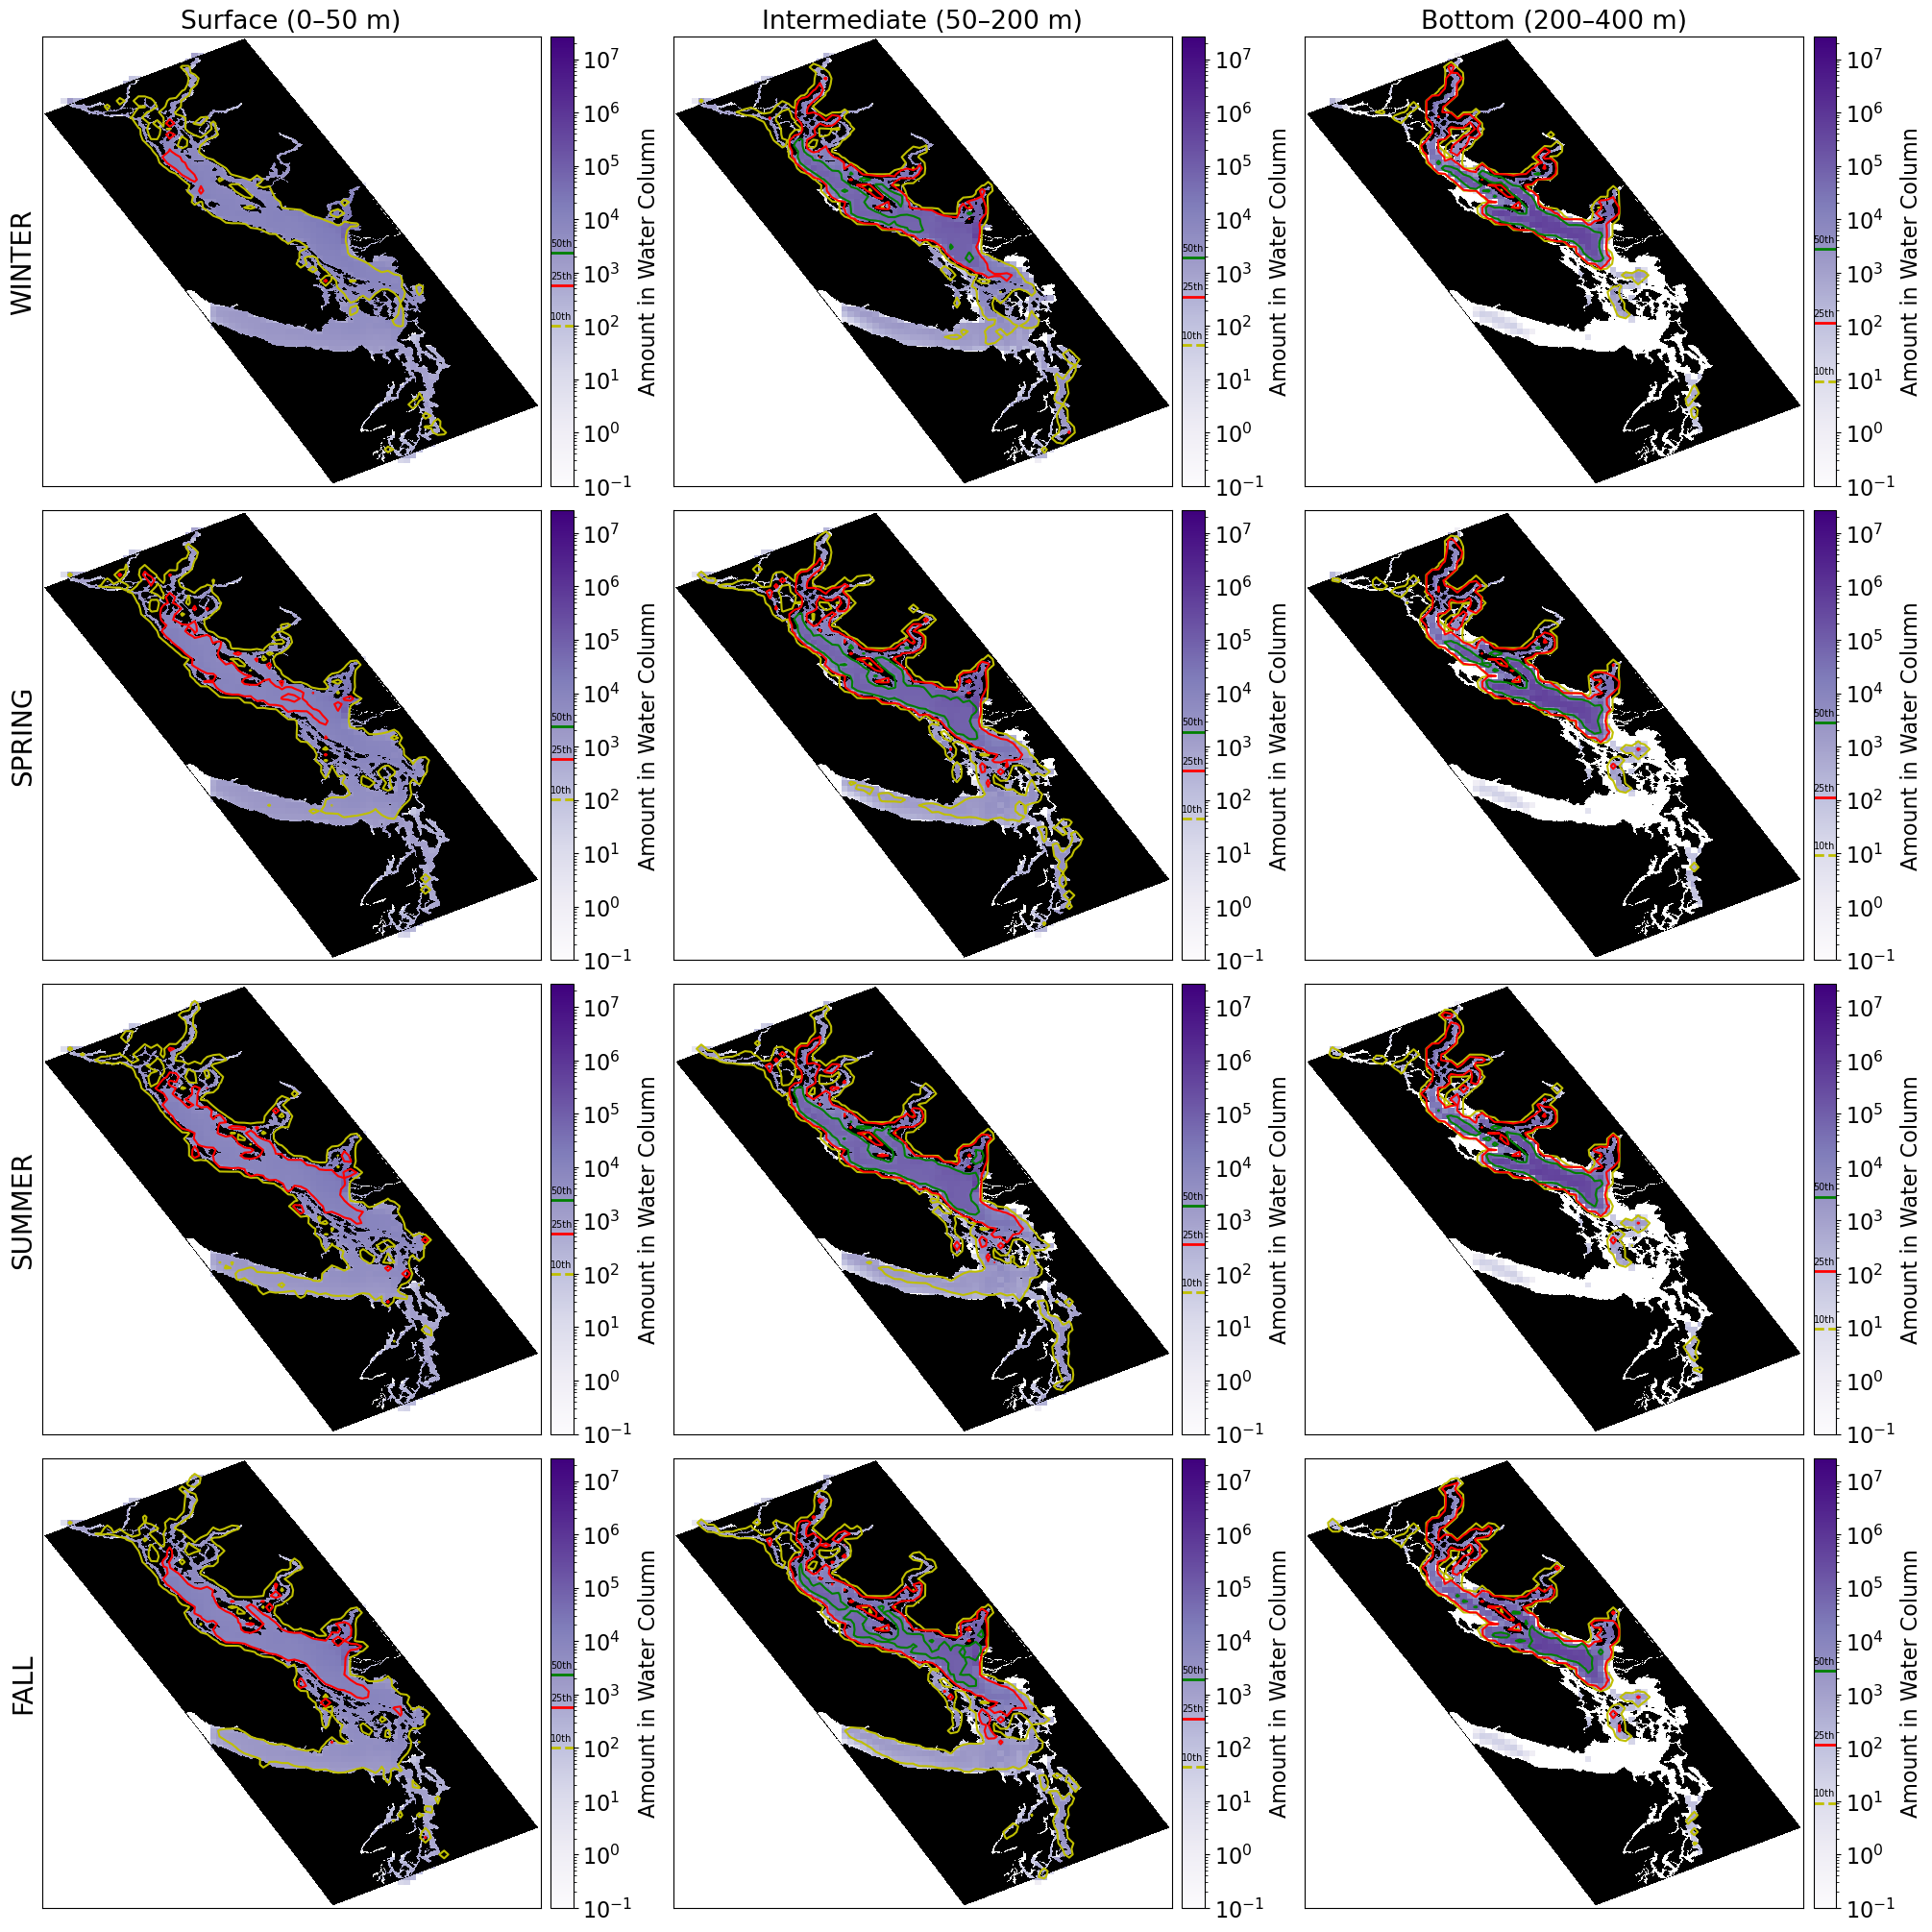

<Figure size 640x480 with 0 Axes>

In [215]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# Colormap for mask
colors = [(0, 0, 0, 1),  # Black for land
          (0, 0, 0, 0)]  # Transparent for water
cmap = ListedColormap(colors)

# Seasons dictionary
seasons = {
    "WINTER": "blue",
    "SPRING": "green",
    "SUMMER": "orange",
    "FALL": "red"
}

# Depth layers
layers = ["0-50 m", "50-200 m", "200-400 m"]

# Percentile thresholds (25 and 50 for each depth layer)
TT1 = [TT_water_surface1, TT_water_intermediate1, TT_water_bottom1]
TT2 = [TT_water_surface2, TT_water_intermediate2, TT_water_bottom2]
TT3 = [TT_water_surface3, TT_water_intermediate3, TT_water_bottom3]


fig, ax = plt.subplots(4, 3, figsize=(20, 20), constrained_layout=True)

for row, (season, col) in enumerate(seasons.items()):
    for col_idx, layer in enumerate(layers):

        # pcolormesh
        c = ax[row, col_idx].pcolormesh(longitudes, latitudes,
                                        amount_water[layer].T,
                                        cmap="Purples", norm=norm)

        # Contour for this season
        cs = ax[row, col_idx].contour(longitudes, latitudes,
                                      eval(f"water_amount_{season.lower()}")[layer].T,
                                      levels=[TT1[col_idx], TT2[col_idx], TT3[col_idx]],
                                      colors=['y', 'r', 'g'],  # season color for contour
                                      linestyles=["-", "-", "-"],
                                      linewidths=1.5)

        # Mask overlay
        ax[row, col_idx].pcolormesh(mask['nav_lon'], mask['nav_lat'],
                                    mask['tmask'][0][0], cmap=cmap)

        # Titles (top row only)
        if row == 0:
            titles = ["Surface (0–50 m)", "Intermediate (50–200 m)", "Bottom (200–400 m)"]
            ax[row, col_idx].set_title(titles[col_idx])

        # Y labels (left col only)
        if col_idx == 0:
            ax[row, col_idx].set_ylabel(season, fontsize=20)
        #
        ax[row, col_idx].set_xticks([])
        ax[row, col_idx].set_yticks([])
        # Add **vertical colorbar for each subplot**
        cb = fig.colorbar(c, ax=ax[row, col_idx], orientation="vertical", fraction=0.05, pad=0.02)
        cb.set_label("Amount in Water Column")

        # Add percentile marks on the colorbar
        cb.ax.hlines(TT1[col_idx], *cb.ax.get_xlim(), colors="y", linestyles="--", linewidth=2)
        cb.ax.hlines(TT2[col_idx], *cb.ax.get_xlim(), colors="r", linestyles="-", linewidth=2)
        cb.ax.hlines(TT3[col_idx], *cb.ax.get_xlim(), colors="g", linestyles="-", linewidth=2)
        #
        cb.ax.text(0.0, TT1[col_idx] + TT1[col_idx] / 2, f"{Q1}th", va="center", ha="left", fontsize=7, color="black")
        cb.ax.text(0.0, TT2[col_idx] + TT2[col_idx] / 2, f"{Q2}th", va="center", ha="left", fontsize=7, color="black")
        cb.ax.text(0.0, TT3[col_idx] + TT3[col_idx] / 2, f"{Q3}th", va="center", ha="left", fontsize=7, color="black")
#
plt.show()
plt.tight_layout()

/tmp/ipykernel_2900924/3405414977.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[row, col_idx].pcolormesh(mask['nav_lon'], mask['nav_lat'],
/tmp/ipykernel_2900924/3405414977.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[row, col_idx].pcolormesh(mask['nav_lon'], mask['nav_lat'],
/tmp/ipykernel_2900924/3405414977.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.

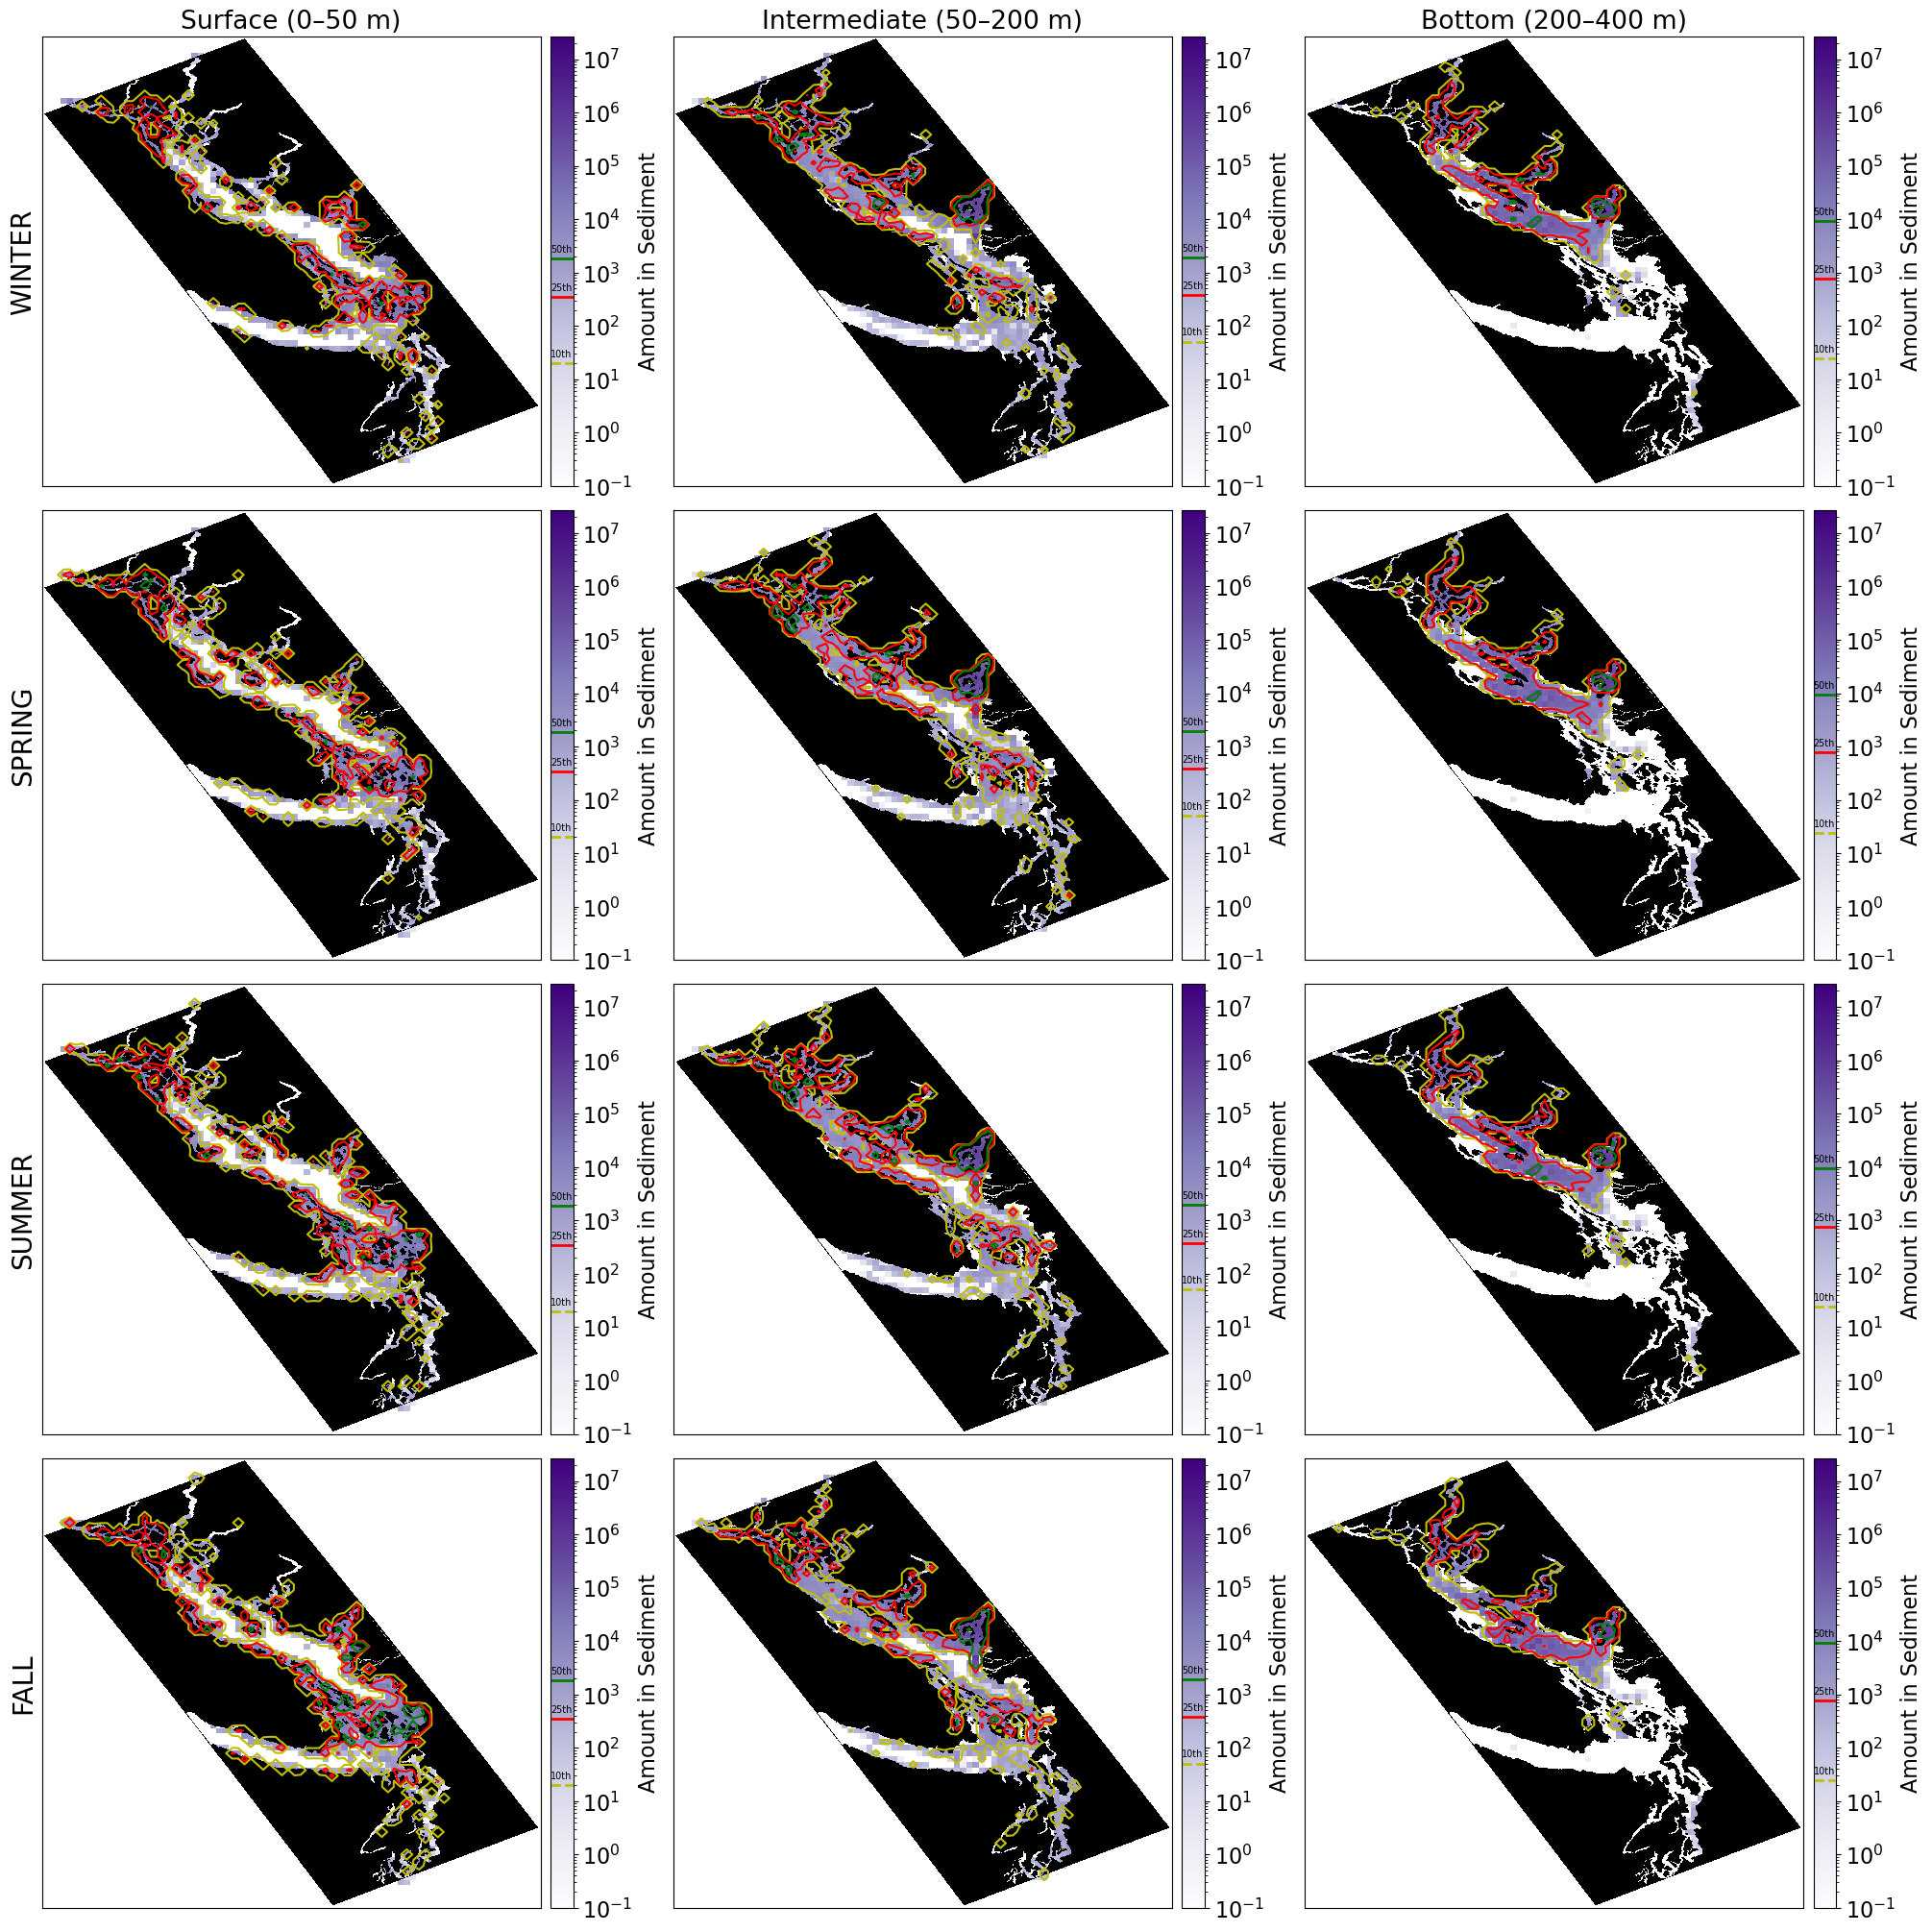

<Figure size 640x480 with 0 Axes>

In [216]:
TT1 = [TT_sediment_surface1, TT_sediment_intermediate1, TT_sediment_bottom1]
TT2 = [TT_sediment_surface2, TT_sediment_intermediate2, TT_sediment_bottom2]
TT3 = [TT_sediment_surface3, TT_sediment_intermediate3, TT_sediment_bottom3]

fig, ax = plt.subplots(4, 3, figsize=(20, 20), constrained_layout=True)

for row, (season, col) in enumerate(seasons.items()):
    for col_idx, layer in enumerate(layers):

        # pcolormesh
        c = ax[row, col_idx].pcolormesh(longitudes, latitudes,
                                        amount_sediment[layer].T,
                                        cmap="Purples", norm=norm)

        # Contour for this season
        cs = ax[row, col_idx].contour(longitudes, latitudes,
                                      eval(f"sediment_amount_{season.lower()}")[layer].T,
                                      levels=[TT1[col_idx], TT2[col_idx], TT3[col_idx]],
                                      colors=['y', 'r', 'g'],  # season color for contour
                                      linestyles=["-", "-", "-"],
                                      linewidths=1.5)

        # Mask overlay
        ax[row, col_idx].pcolormesh(mask['nav_lon'], mask['nav_lat'],
                                    mask['tmask'][0][0], cmap=cmap)

        # Titles (top row only)
        if row == 0:
            titles = ["Surface (0–50 m)", "Intermediate (50–200 m)", "Bottom (200–400 m)"]
            ax[row, col_idx].set_title(titles[col_idx])

        # Y labels (left col only)
        if col_idx == 0:
            ax[row, col_idx].set_ylabel(season, fontsize=20)
        #
        ax[row, col_idx].set_xticks([])
        ax[row, col_idx].set_yticks([])
        # Add **vertical colorbar for each subplot**
        cb = fig.colorbar(c, ax=ax[row, col_idx], orientation="vertical", fraction=0.05, pad=0.02)
        cb.set_label("Amount in Sediment")

        # Add percentile marks on the colorbar
        cb.ax.hlines(TT1[col_idx], *cb.ax.get_xlim(), colors="y", linestyles="--", linewidth=2)
        cb.ax.hlines(TT2[col_idx], *cb.ax.get_xlim(), colors="r", linestyles="-", linewidth=2)
        cb.ax.hlines(TT3[col_idx], *cb.ax.get_xlim(), colors="g", linestyles="-", linewidth=2)
        #
        cb.ax.text(0.0, TT1[col_idx] + TT1[col_idx] / 2, f"{Q1}th", va="center", ha="left", fontsize=7, color="black")
        cb.ax.text(0.0, TT2[col_idx] + TT2[col_idx] / 2, f"{Q2}th", va="center", ha="left", fontsize=7, color="black")
        cb.ax.text(0.0, TT3[col_idx] + TT3[col_idx] / 2, f"{Q3}th", va="center", ha="left", fontsize=7, color="black")
#
plt.show()
plt.tight_layout()

Comments from Susan:

- Do the same exact plots but:
    - Look at what is happening after 9 months of released, so -> Winter to Fall (9 months), Spring to Winter (9months), Summer to Spring (9 months) and Fall to Summer (9 months). This would help to answer the question of: Does it matter more wheen in time are we looking? Or more it matters when the particles where released?